# JURNAL MODUL 2

Melakukan import pada library yang akan digunakan

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Melakukan read pada gambar dan langsung menampilkannya

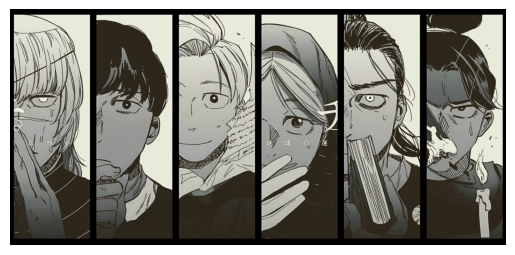

In [2]:
aktivis = plt.imread('Assets/aktivis.jpg')
plt.imshow(aktivis)
plt.axis('off')
plt.show()

Dibawah ini adalah pembagian gambar untuk setiap karakter menggunakaan ukuran pixel

In [3]:
badeni = aktivis[:, 0:453, :]
albert = aktivis[:, 453:906, :]
rafal = aktivis[:, 906:1359, :]
jolenta = aktivis[:, 1359:1812, :]
oczy = aktivis[:, 1812:2265, :]
draka = aktivis[:, 2265:2718, :]

Membuat canvas kosong dengan np.zeros, lalu mengisinya dengan gambar-gambar yang digabungkan berdasarkan urutan waktu, menggunakan loop sederhana pada sumbu y sesuai dengan ukuran masing-masing gambar.

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

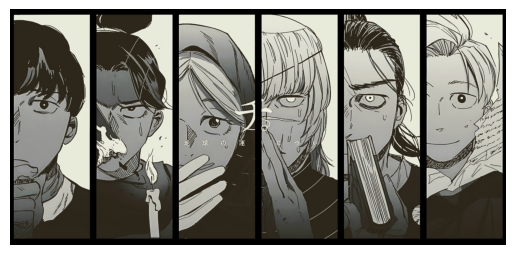

In [4]:
timeline = np.zeros((aktivis.shape[0], aktivis.shape[1], 3), dtype=np.uint8)
timeline[:, 0:453, :] = albert
timeline[:, 453:906, :] = draka
timeline[:, 906:1359, :] = jolenta
timeline[:, 1359:1812, :] = badeni
timeline[:, 1812:2265, :] = oczy
timeline[:, 2265:2718, :] = rafal
timeline = np.array(timeline, dtype=np.uint8)  
plt.imshow(timeline)
plt.axis('off')

Dibawah ini merupakan fungsi untuk menampilkan histogram

In [5]:
def histo(img, alpha):
    canvas = [i for i in range(256)]
    canvas2 = np.zeros(256)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = img[i,j]
            canvas2[val]+=1
    
    normalized_canvas2 = canvas2/np.sum(canvas2)

    plt.bar(canvas, normalized_canvas2, alpha=alpha)
    plt.title("Histogram")

Dibawah ini merupakan Fungsi ekualisasi yang mengubah gambar menjadi grayscale, lalu mendapatkan panjang dan lebar gambar. Selanjutnya, menggunakan loop untuk menghitung jumlah masing-masing intensitas piksel, menghitung CDF kumulatif setiap intensitas dengan loop, dan menghitung intensitas baru hasil ekualisasi melalui loop. Setelah itu, membuat canvas kosong dengan np.zeros dan mengisi canvas tersebut menggunakan loop berdasarkan intensitas baru hasil ekualisasi.

In [6]:
def equalization(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    total = h * w

    hist = [0] * 256
    for i in range(h):
        for j in range(w):
            value = gray[i, j]
            hist[value] += 1

    cdf = [0] * 256
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]

    cdf_min = min(x for x in cdf if x > 0)
    new_val = [0] * 256
    for i in range(256):
        new_val[i] = round((cdf[i] - cdf_min) / (total - cdf_min) * 255)

    result = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            result[i, j] = new_val[gray[i, j]]

    return result

Memanggil fungsi ekualisasi pada gambar timeline dan menampilkan hasil ekualisasi

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

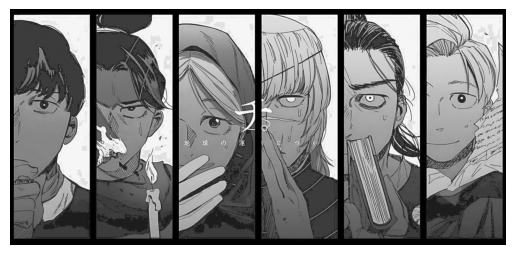

In [7]:
equalized = equalization(timeline)
plt.imshow(equalized, cmap='gray')
plt.axis('off')

Menampilkan dua histogram, yaitu sebelum dan sesudah ekualisasi. Terlihat bahwa setelah ekualisasi, distribusi intensitas piksel menjadi lebih merata dibandingkan sebelumnya, karena proses ekualisasi membuat intensitas piksel pada gambar menjadi lebih seimbang.

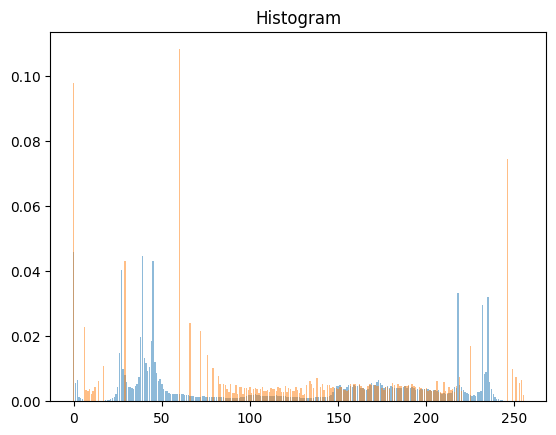

In [8]:
histo(timeline, 0.5)
histo(equalized, 0.5)

Fungsi spesifikasi yang menerima dua gambar, lalu mengubah gambar referensi menjadi grayscale. Membuat dua array kosong berukuran 256 untuk menghitung jumlah masing-masing intensitas piksel menggunakan loop, kemudian membuat dua array kosong lagi untuk menghitung intensitas kumulatif kedua gambar dengan loop. Setelah itu, menggunakan loop sederhana untuk membagi setiap intensitas kumulatif dengan nilai maksimum intensitas guna membentuk CDF kumulatif. Selanjutnya, membuat array kosong berukuran 256 untuk menyimpan pemetaan antara CDF sumber dan target, lalu membuat canvas kosong dengan np.zeros_like, dan mengisi canvas tersebut dengan hasil spesifikasi menggunakan loop.

In [9]:
def specification(source, reference):
    reference_gray = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)

    source_hist = [0] * 256
    reference_hist = [0] * 256

    for i in range(source.shape[0]):
        for j in range(source.shape[1]):
            source_hist[source[i, j]] += 1

    for i in range(reference_gray.shape[0]):
        for j in range(reference_gray.shape[1]):
            reference_hist[reference_gray[i, j]] += 1

    source_cdf = [0] * 256
    reference_cdf = [0] * 256

    source_cdf[0] = source_hist[0]
    reference_cdf[0] = reference_hist[0]

    for i in range(1, 256):
        source_cdf[i] = source_cdf[i - 1] + source_hist[i]
        reference_cdf[i] = reference_cdf[i - 1] + reference_hist[i]

    source_cdf = [x / source_cdf[-1] for x in source_cdf]
    reference_cdf = [x / reference_cdf[-1] for x in reference_cdf]

    mapping = [0] * 256
    for i in range(256):
        diff = [abs(source_cdf[i] - ref) for ref in reference_cdf]
        mapping[i] = diff.index(min(diff))

    result = np.zeros_like(source)
    for i in range(source.shape[0]):
        for j in range(source.shape[1]):
            result[i, j] = mapping[source[i, j]]

    return result

Mengimpor gambar Draka dan Propaganda, lalu melakukan spesifikasi gambar yang sudah diekualisasi terhadap kedua gambar tersebut, kemudian menampilkan hasil dari proses ekualisasinya.

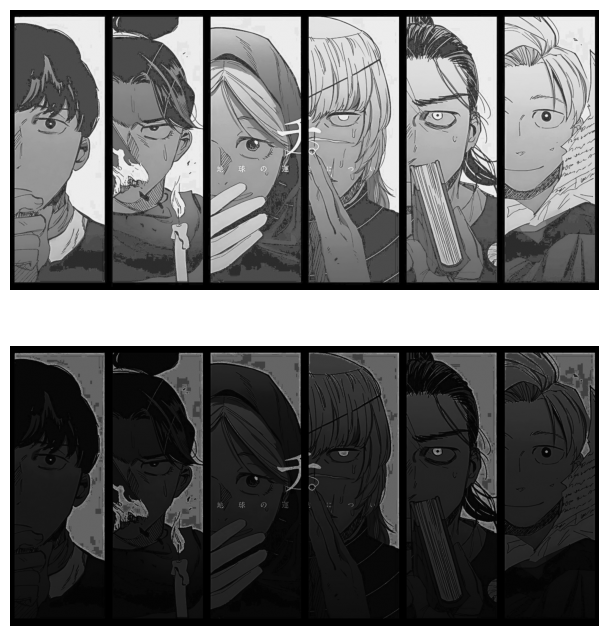

In [10]:
draka = plt.imread('Assets/draka.jpg')
propaganda = plt.imread('Assets/propaganda.jpg')

spec_draka = specification(equalized, draka)
spec_propaganda = specification(equalized, propaganda)

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.imshow(spec_draka, cmap='gray')
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(spec_propaganda, cmap='gray')
plt.axis('off')
plt.show()

Membuat canvas kosong menggunakan np.zeros_like, lalu secara manual memasukkan bagian hasil spesifikasi terhadap Draka dan hasil spesifikasi terhadap Propaganda sesuai dengan ketentuan soal.

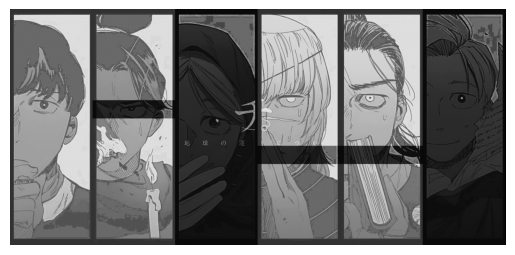

In [11]:
kondisi = np.zeros_like(equalized, dtype=np.uint8)
kondisi[:, 0:453] = spec_draka[:, 0:453]
kondisi[0:500, 453:906] = spec_draka[0:500, 453:906]
kondisi[500:600, 453:906] = spec_propaganda[500:600, 453:906]
kondisi[600:, 453:906] = spec_draka[600:, 453:906]
kondisi[:, 906:1359] = spec_propaganda[:, 906:1359]
kondisi[0:750, 1359:1812] = spec_draka[0:750, 1359:1812]
kondisi[750:850, 1359:1812] = spec_propaganda[750:850, 1359:1812]
kondisi[850:, 1359:1812] = spec_draka[850:, 1359:1812]
kondisi[0:750, 1812:2265] = spec_draka[0:750, 1812:2265]
kondisi[750:850, 1812:2265] = spec_propaganda[750:850, 1812:2265]
kondisi[850:, 1812:2265] = spec_draka[850:, 1812:2265]
kondisi[:, 2265:2718] = spec_propaganda[:, 2265:2718]
plt.imshow(kondisi, cmap="gray")
plt.axis('off')
plt.show()

Membuat canvas kosong dengan np.zeros_like, lalu secara manual mengisi bagian-bagian yang merupakan hasil spesifikasi terhadap Draka dan Propaganda sesuai dengan instruksi soal.

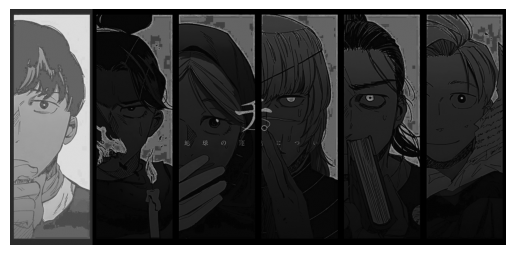

In [12]:
hidup = np.zeros_like(equalized, dtype=np.uint8)
hidup[:, 0:453] = spec_draka[:, 0:453]
hidup[:, 453:] = spec_propaganda[:, 453:]
plt.imshow(hidup, cmap="gray")
plt.axis('off')
plt.show()
